# Simple Evolutionary Exploration  Walkthrough

This notebook contains instructions on how to use the SEE module, along with several examples. These instructions will cover the following parts: 
* [Import Image Files](#Import_Image_Files)
* [Manual Search](#Manual_Search)
* [Genetic Algorithm Search](#Genetic_Algorithm_Search)
* [Reading the Results](#Reading_the_Results)

----
<a name="Import_Image_Files"></a>

## Import Image Files

First import the following packages:

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import imageio

from see import JupyterGUI

Dropdown(description='Choose image:', index=2, options=(PosixPath('Image_data/Examples/Airpods.JPEG'), PosixPa…

import imageio
data.img = imageio.imread('Image_data/Examples/Chameleon.jpg')
data.gmask = imageio.imread('Image_data/Examples/Chameleon_GT.png')


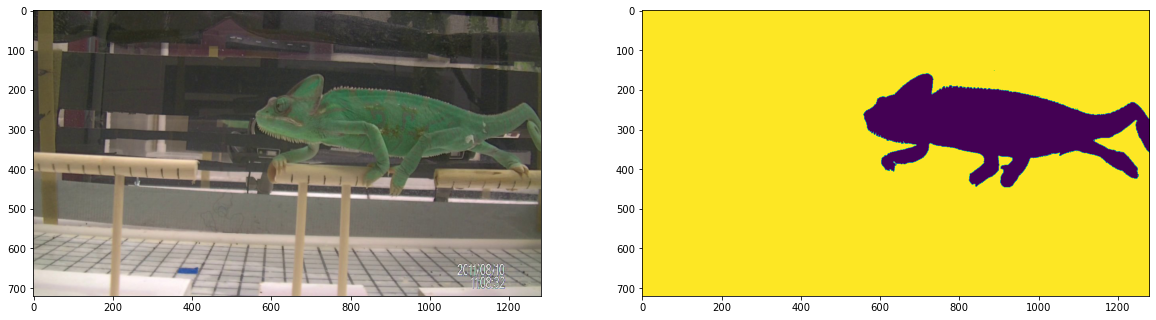

In [2]:
data = JupyterGUI.pickimage()

# Create Workflow

In [3]:
from see import base_classes 

In [4]:
from see.Segmentors import segmentor
from see.ColorSpace import colorspace
from see.Workflow import workflow
from see.Segment_Fitness import segment_fitness

wf = workflow(algolist=[colorspace, segmentor, segment_fitness])

In [5]:
from see.base_classes import pipedata
individual = segmentor()
d = pipedata()
d.img = data.img
d.gmask = data.gmask
individual.runAlgo(d)

ColorThreshold -- 
	algorithm = ColorThreshold
	alpha1 = 0.3
	alpha2 = 0.5
	beta1 = 0.2
	beta2 = 0.7
	gamma1 = 0.3
	gamma2 = 0.5
	n_segments = 2
	max_iter = 10
Time: 0.029 s


----
<a name="Genetic_Algorithm_Search"></a>

## Genetic Algorithm Search

First import image files, as well as the following packages:

In [6]:
from see import GeneticSearch

To run the genetic algorithm, we need to initialize an instance of an evolver. The original image and ground truth segmentation image are inputs to it, along with an integer value for population size. This value sets how many indivudals are in our population. For this example, we'll set this number to be equal to 10.

In [7]:
mydata = base_classes.pipedata()
mydata.img = data.img
mydata.gmask = data.gmask

In [8]:
my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=10)

Now that the evolver has been initialized, we can run the genetic algorithm for a specified number of generations (or iterations). Here we will set this number equal to 5.

In [9]:
# warnings may appear when this runs
population = my_evolver.run(ngen=10)

Initializing a new random population
Generation 0 of population size 10
Watershed -- 
	colorspace = XYZ
	multichannel = False
	channel = 2
	algorithm = Watershed
	alpha1 = 0.6953125
	alpha2 = 0.1640625
	beta1 = 0.9140625
	beta2 = 0.8828125
	gamma1 = 0.66796875
	gamma2 = 0.796875
	n_segments = 3
	max_iter = 7
Time: 2.084 s
fitness=1.0000007562736803

Felzenszwalb -- 
	colorspace = YDbDr
	multichannel = True
	channel = 0
	algorithm = Felzenszwalb
	alpha1 = 0.6015625
	alpha2 = 0.5625
	beta1 = 0.79296875
	beta2 = 0.0390625
	gamma1 = 0.9375
	gamma2 = 0.09375
	n_segments = 8
	max_iter = 13
Time: 3.482 s
fitness=1.0010745579437303

ColorThreshold -- 
	colorspace = YUV
	multichannel = False
	channel = 0
	algorithm = ColorThreshold
	alpha1 = 0.22265625
	alpha2 = 0.23046875
	beta1 = 0.76953125
	beta2 = 0.0625
	gamma1 = 0.34765625
	gamma2 = 0.8125
	n_segments = 4
	max_iter = 1
Time: 0.848 s
fitness=1



/Users/colbrydi/REPOS/_see_insight/see-segment/see/Segmentors.py:382: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  output = skimage.segmentation.slic(


SlicO -- 
	colorspace = YIQ
	multichannel = False
	channel = 1
	algorithm = SlicO
	alpha1 = 0.16015625
	alpha2 = 0.859375
	beta1 = 0.93359375
	beta2 = 0.49609375
	gamma1 = 0.15625
	gamma2 = 0.28515625
	n_segments = 6
	max_iter = 6
Time: 1.107 s
fitness=1

SlicO -- 
	colorspace = YDbDr
	multichannel = True
	channel = 0
	algorithm = SlicO
	alpha1 = 0.59375
	alpha2 = 0.4921875
	beta1 = 0.75
	beta2 = 0.11328125
	gamma1 = 0.54296875
	gamma2 = 0.08203125
	n_segments = 3
	max_iter = 8
Time: 1.227 s
fitness=1



/Users/colbrydi/REPOS/_see_insight/see-segment/envs/lib/python3.9/site-packages/skimage/segmentation/morphsnakes.py:106: FutureWarning: circle_level_set is deprecated in favor of disk_level_set.circle_level_set will be removed in version 0.19
  res = circle_level_set(image_shape)


MorphGeodesicActiveContour -- 
	colorspace = YPbPr
	multichannel = True
	channel = 0
	algorithm = MorphGeodesicActiveContour
	alpha1 = 0.421875
	alpha2 = 0.68359375
	beta1 = 0.8125
	beta2 = 0.55859375
	gamma1 = 0.23046875
	gamma2 = 0.609375
	n_segments = 9
	max_iter = 4
Time: 1.711 s
fitness=1

QuickShift -- 
	colorspace = YPbPr
	multichannel = True
	channel = 0
	algorithm = QuickShift
	alpha1 = 0.5625
	alpha2 = 0.12890625
	beta1 = 0.6953125
	beta2 = 0.0859375
	gamma1 = 0.51171875
	gamma2 = 0.7578125
	n_segments = 8
	max_iter = 10
Time: 1044.697 s
fitness=0.899722887078479

ColorThreshold -- 
	colorspace = YIQ
	multichannel = True
	channel = 0
	algorithm = ColorThreshold
	alpha1 = 0.1328125
	alpha2 = 0.8203125
	beta1 = 0.09765625
	beta2 = 0.23046875
	gamma1 = 0.64453125
	gamma2 = 0.8359375
	n_segments = 2
	max_iter = 16
Time: 0.711 s
fitness=1

Morphological_Chan_Vese -- 
	colorspace = YDbDr
	multichannel = False
	channel = 2
	algorithm = Morphological_Chan_Vese
	alpha1 = 0.265625
	alp

/Users/colbrydi/REPOS/_see_insight/see-segment/see/Segmentors.py:370: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  output = skimage.segmentation.slic(


Slic -- 
	colorspace = RGB CIE
	multichannel = True
	channel = 2
	algorithm = Slic
	alpha1 = 0.49609375
	alpha2 = 0.73046875
	beta1 = 0.19140625
	beta2 = 0.19140625
	gamma1 = 0.1875
	gamma2 = 0.66015625
	n_segments = 8
	max_iter = 14
Time: 1.368 s
fitness=1

ColorThreshold -- 
	colorspace = YPbPr
	multichannel = True
	channel = 1
	algorithm = ColorThreshold
	alpha1 = 0.828125
	alpha2 = 0.15625
	beta1 = 0.0078125
	beta2 = 0.34765625
	gamma1 = 0.6328125
	gamma2 = 0.7890625
	n_segments = 6
	max_iter = 2
Time: 0.783 s
fitness=1

Morphological_Chan_Vese -- 
	colorspace = RGB CIE
	multichannel = True
	channel = 1
	algorithm = Morphological_Chan_Vese
	alpha1 = 0.51171875
	alpha2 = 0.42578125
	beta1 = 0.5
	beta2 = 0.5390625
	gamma1 = 0.5625
	gamma2 = 0.625
	n_segments = 4
	max_iter = 12
Time: 2.516 s
fitness=1

MorphGeodesicActiveContour -- 
	colorspace = XYZ
	multichannel = False
	channel = 2
	algorithm = MorphGeodesicActiveContour
	alpha1 = 0.65625
	alpha2 = 0.2421875
	beta1 = 0.44140625
	be

KeyboardInterrupt: 

----
<a name="Reading_the_Results"></a>

## Reading the Results

After the genetic algorithm is complete, we can retrieve the individuals that resulted in the lowest (best) fitness values by printing `my_evolver.hof`. These individuals are sorted according to fitness value, so to get the overal best individual, we can simply look at the first individual in the list. 

In [ ]:
params = my_evolver.hof[0]

print('Best Individual:\n', params)

We can see the mask this individual generates by evaluating it, then plotting the result:

In [ ]:
seg = workflow(params)
data = seg.pipe(data)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(data.img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(data.mask)
plt.title("Segmentation")
plt.axis('off')

plt.tight_layout
plt.show()

We can also use `FitnessFunction` to calculate the final fitness value for this algorithm:

In [ ]:
print('Fitness Value: ', segment_fitness().evaluate(data.mask, data.gmask)[0])

If this value is satisfactory, we can then get usable code to run this algorithm anywhere, including outside this notebook. The `print_best_algorithm_code` function does this using the given individual:

In [ ]:
dir(base_classes)

In [ ]:
ex = base_classes.print_best_algorithm_code(my_evolver.hof[0])

With this code, make sure to import skimage, along with any input images this algorithm will be applied to.